In [1]:
# Imports
import numpy as np
import numpy.ma as ma
import os
from matplotlib import pyplot as plt
import h5py as h5
from PyXRIM.Corrections import Corrector
from PyXRIM.misc import  bin_ndarray
from functions import *
from decompFunctions import *
%matplotlib notebook

In [2]:
#Inputs
fname = 'D:\Libraries\Documents\Materials Informatics\LiCoO2_Al2O3_20160330.hdf5'
datasets = ['S014','S016','S018'] # name of raw dataset
procRefName = 'bkg_corrected' # reference name to append to rawData



In [3]:
# open h5file
f = h5.File(fname, mode='r') 
# Always open in read mode 'r'.
# Until you're ready to write into the file. This is especially true if your OS is not Unix-based like Windows.
rawg = f['20160330/Raw']
procg = f['20160330/Process']
meta = f['20160330/Meta']

In [4]:
rawDset14 = rawg['S014']
procDset14 = f[rawDset14.attrs['bkg_corrected']][:,:,:]
twotheta14 = rawDset14.attrs['delta']
voltage14 = (rawDset14.attrs['DAC5']*10)[0]

<IPython.core.display.Javascript object>


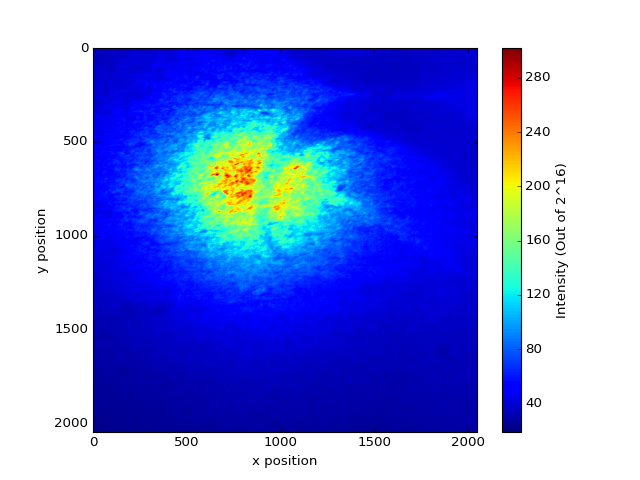

In [5]:
fig,ax = plt.subplots()
cax = ax.imshow(procDset14[15,:,:])
cbar = fig.colorbar(cax)
cbar.set_label('Intensity (Out of 2^16)')
ax.set_xlabel('x position')
ax.set_ylabel('y position')

In [6]:
roi1x=slice(400,1424)
roi1y=slice(220,1244)  #original 1024

rawDset16 = rawg['S016']
procDset16 = f[rawDset16.attrs['bkg_corrected']][:,roi1y,roi1x]
twotheta16 = rawDset16.attrs['delta']
voltage16 = (rawDset16.attrs['DAC5']*10)[0]

<IPython.core.display.Javascript object>


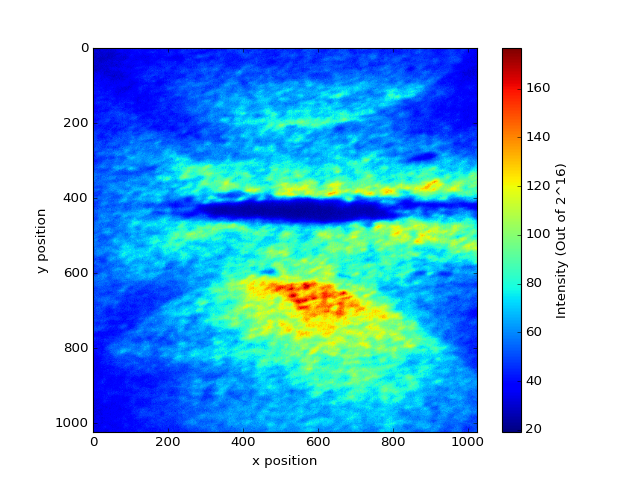

In [7]:
fig,ax = plt.subplots()
cax = ax.imshow(procDset16[15,:,:])
cbar = fig.colorbar(cax)
cbar.set_label('Intensity (Out of 2^16)')
ax.set_xlabel('x position')
ax.set_ylabel('y position')

In [8]:
rawDset18 = rawg['S018']
procDset18 = f[rawDset18.attrs['bkg_corrected']][:,:,:]
twotheta18 = rawDset18.attrs['delta']
voltage18 = (rawDset18.attrs['DAC5']*10)[0]

<IPython.core.display.Javascript object>


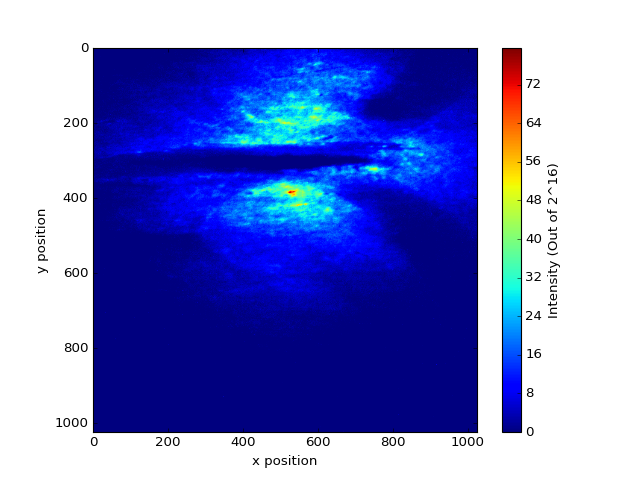

In [9]:
fig,ax = plt.subplots()
cax = ax.imshow(procDset18[15,:,:])
cbar = fig.colorbar(cax)
cbar.set_label('Intensity (Out of 2^16)')
ax.set_xlabel('x position')
ax.set_ylabel('y position')

<IPython.core.display.Javascript object>


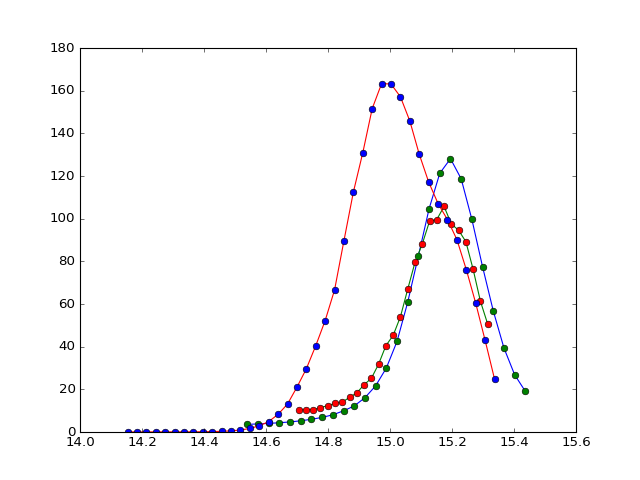

In [10]:
fig,ax = plt.subplots()
ax.plot(twotheta14,np.mean(procDset14,axis=(1,-1)),marker = 'o', markerfacecolor='g')
ax.plot(twotheta16,np.mean(procDset16,axis=(1,-1)),marker = 'o', markerfacecolor='r')
ax.plot(twotheta18,np.mean(procDset18,axis=(1,-1)),marker = 'o', markerfacecolor='b')

In [11]:
print procDset14.shape
print procDset16.shape
print procDset18.shape
procDset14_new =  procDset18[13:,:,:]
procDset16_new =  procDset18[13:,:,:]
procDset18_new =  procDset18[13:,:,:]

(27L, 2048L, 2048L)
(27L, 1024L, 1024L)
(40L, 1024L, 1024L)


In [13]:
##Insert DELETE CODE
#delete = [0]

#data_new = np.vstack([data[1:25,:,:],data[42:88,:,:]])
#datalog_new = np.vstack([datalog[1:25,:,:],datalog[42:88,:,:]])
#twotheta_new = np.hstack([twotheta[1:25],twotheta[42:88]])


In [13]:
#data_prep14 = preping(procDset14_new, logscaling = False, feature_scaling=False, feature_range=(0.1,1))
data_prep16 = preping(procDset16_new, logscaling = True, feature_scaling=False, feature_range=(0.1,1))
data_prep18 = preping(procDset18_new, logscaling = True, feature_scaling=False, feature_range=(0.1,1))
print data_prep14.shape
print data_prep16.shape
print data_prep18.shape

(27L, 1048576L)
(27L, 1048576L)
(27L, 1048576L)


In [61]:
data_new = np.hstack([data_prep14,data_prep16,data_prep18])
print data_new.shape

(27L, 3145728L)


In [14]:
# set the number of principal components we want PCA to use. Try multiple numbers.
n_comp = 8
r_comp = 20
#projec, eigenvec, var_ratio, pca = doPCA(data2, n_comp, xvals=xvals,xlabel='$2\theta$',cmap='rainbow')
projec, eigenvec, var_ratio, pca = doPCA(data_prep18, n_comp, xvals=twotheta18,xlabel='$2\theta$',
                                         cmap='rainbow',normalize = True,returnComponents = r_comp, plot = True)


decompFunctions.py:76: RuntimeWarning: invalid value encountered in subtract
  data = np.subtract(data.transpose(),meanvect).transpose()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<IPython.core.display.Javascript object>


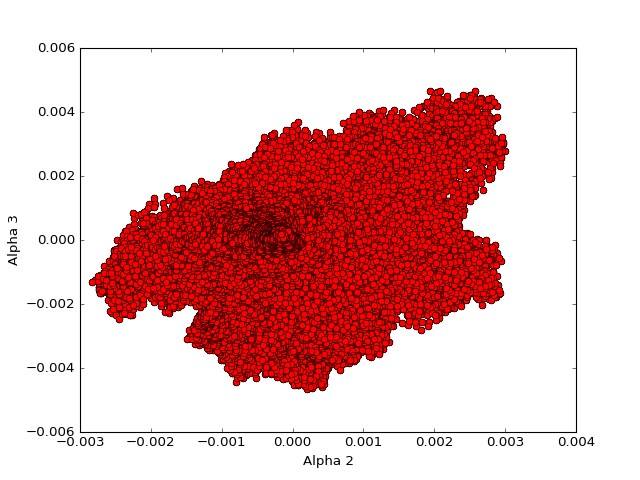

In [56]:
alphax = 2
alphay = 3

alpha = projec

fig,ax = plt.subplots()
ax.plot(alpha[alphax-1,:],alpha[alphay-1,:],'ro')
ax.set_xlabel('Alpha ' + str(alphax))
ax.set_ylabel('Alpha ' + str(alphay))

<IPython.core.display.Javascript object>


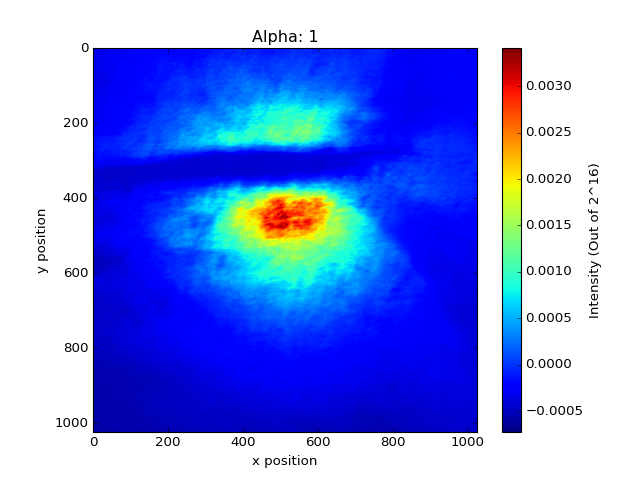

In [54]:
# set the number of principal components we want PCA to use. Try multiple numbers.
n_comp = 4
r_comp = 20
#projec, eigenvec, var_ratio, pca = doPCA(data2, n_comp, xvals=xvals,xlabel='$2\theta$',cmap='rainbow')
projec, eigenvec, var_ratio, pca = doPCA(data_new, n_comp, cmap='rainbow',normalize = True, returnComponents = r_comp, plot = False)


ValueError: total size of new array must be unchanged

0.914364574486
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


<IPython.core.display.Javascript object>


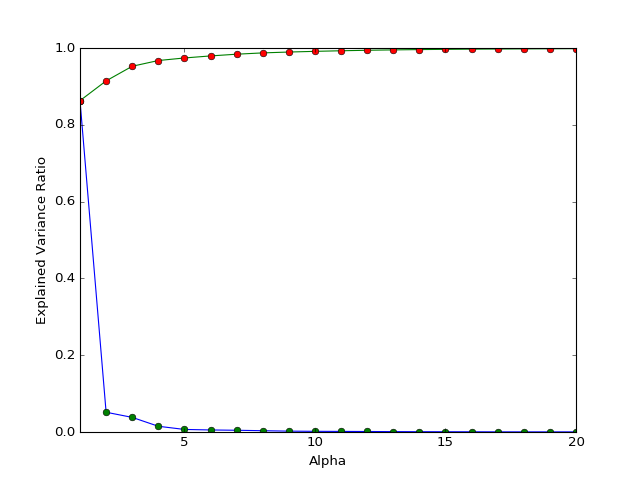

(0, 1)

In [27]:
print np.sum(var_ratio[0:2])
v = var_ratio[0]
vSum = var_ratio[0]
for i in range(1,var_ratio.shape[0]):
    v = np.hstack([v,var_ratio[i]])
    vSum = np.hstack([vSum,np.sum(var_ratio[0:i+1])])

print np.arange(1,var_ratio.shape[0]+1)
    
fig,ax = plt.subplots()
ax.plot(np.arange(1,var_ratio.shape[0]+1),v,marker = 'o', markerfacecolor='g')
ax.plot(np.arange(1,var_ratio.shape[0]+1),vSum,marker = 'o', markerfacecolor='r')
ax.set_xlabel('Alpha')
ax.set_xlim([1,20])
ax.set_ylabel('Explained Variance Ratio')
ax.set_ylim([0,1])
#ax.set_ylim([0.0001,1])
#ax.set_yscale("log", nonposy='clip')

<IPython.core.display.Javascript object>


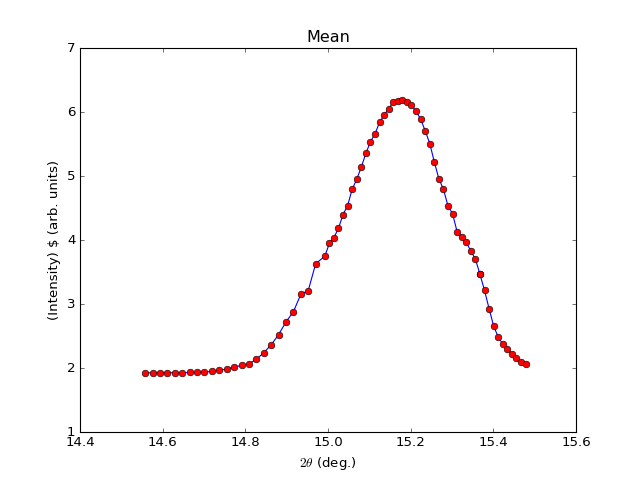

<IPython.core.display.Javascript object>


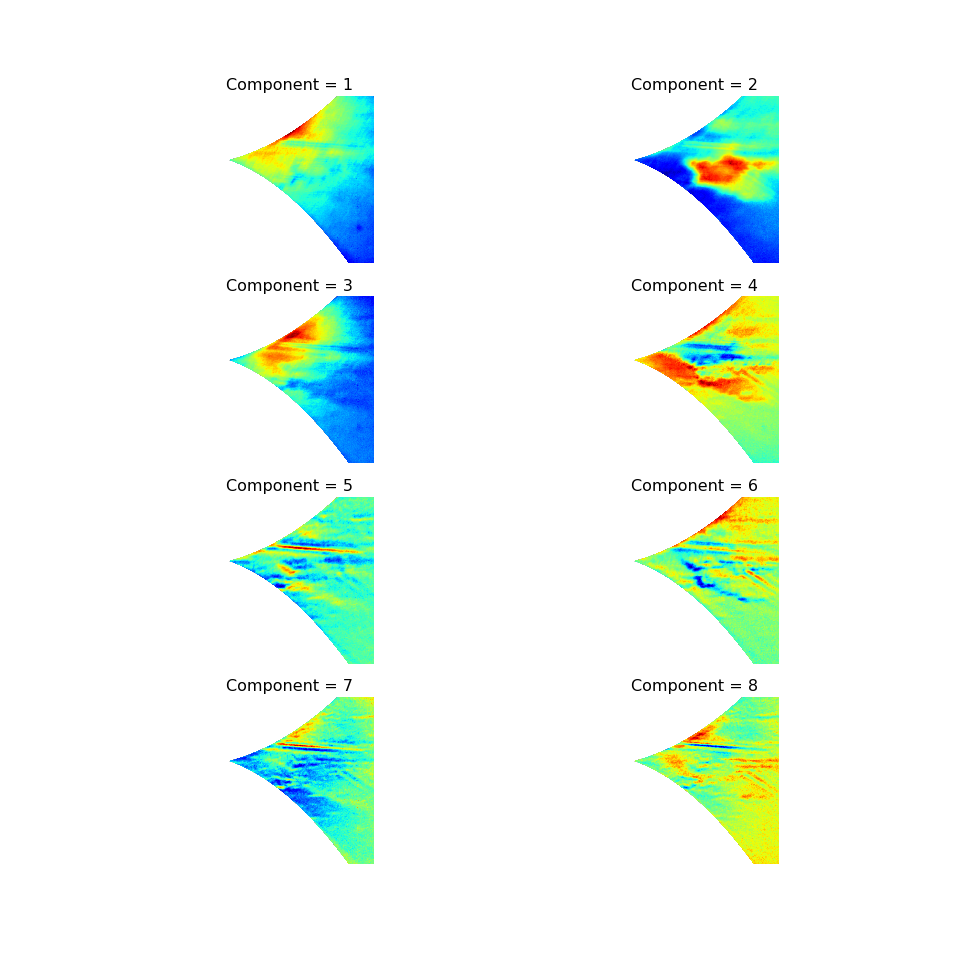

<IPython.core.display.Javascript object>


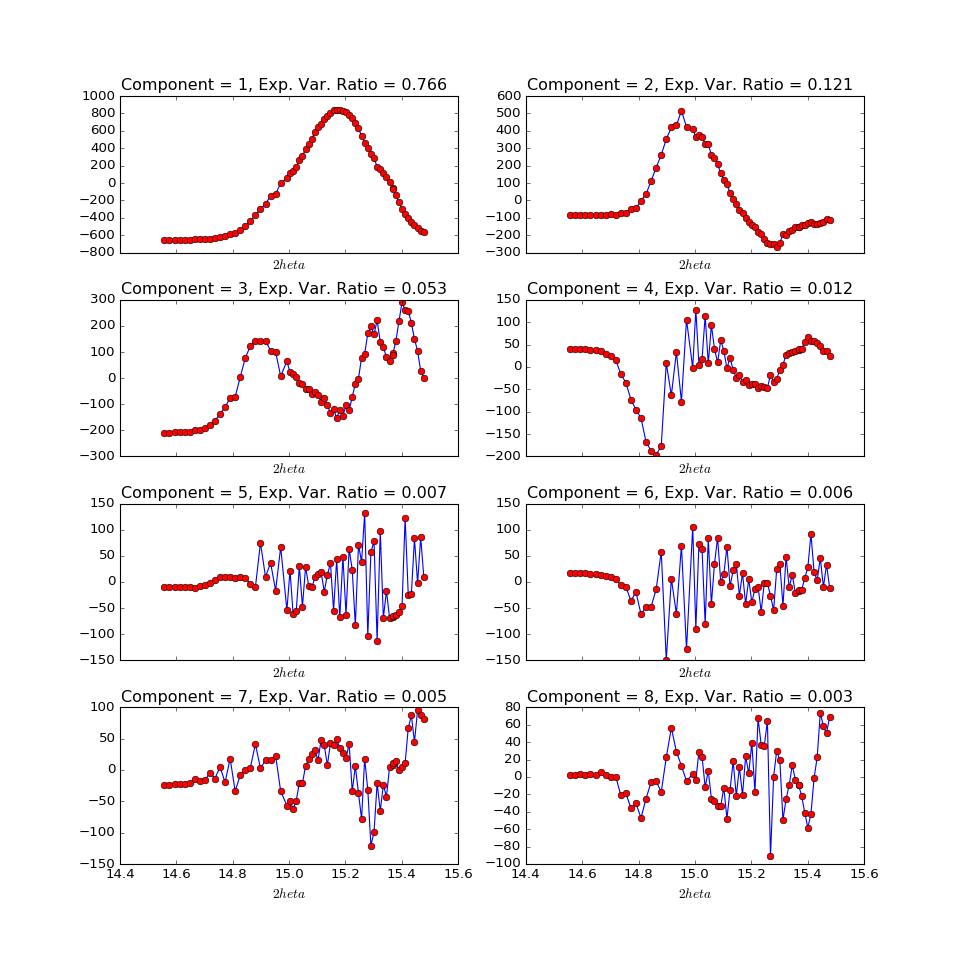

In [28]:
# set the number of principal components we want PCA to use. Try multiple numbers.
n_comp = 8
r_comp = 20
#projec, eigenvec, var_ratio, pca = doPCA(data2, n_comp, xvals=xvals,xlabel='$2\theta$',cmap='rainbow')
projec, eigenvec, var_ratio, pca = doPCA_Mask(datalog_prep, n_comp, mask, xvals=xvals,xlabel='$2\theta$',
                                         cmap='rainbow',normalize = True, returnComponents = r_comp)

<IPython.core.display.Javascript object>


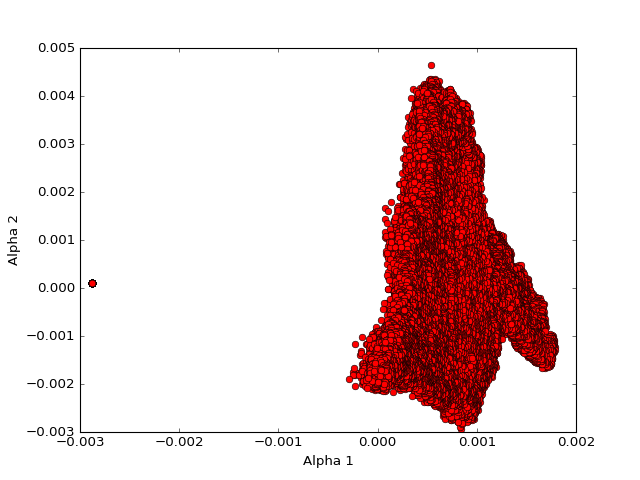

In [29]:
alphax = 1
alphay = 2

alpha = projec.reshape(20,-1)

fig,ax = plt.subplots()
ax.plot(alpha[alphax-1,:],alpha[alphay-1,:],'ro')
ax.set_xlabel('Alpha ' + str(alphax))
ax.set_ylabel('Alpha ' + str(alphay))

0.886660434865
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


<IPython.core.display.Javascript object>


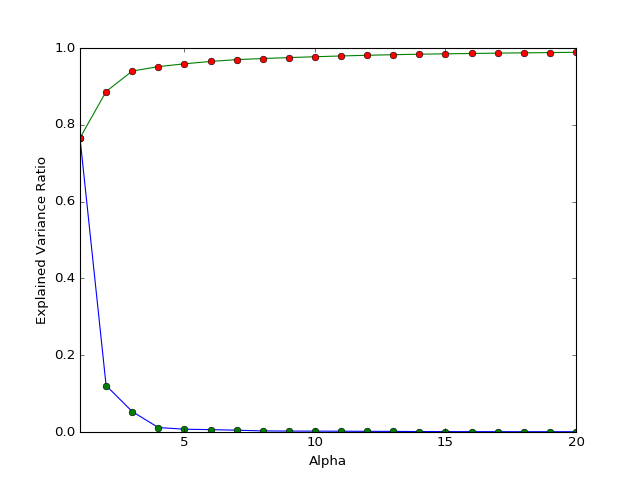

(0, 1)

In [30]:
print np.sum(var_ratio[0:2])
v = var_ratio[0]
vSum = var_ratio[0]
for i in range(1,var_ratio.shape[0]):
    v = np.hstack([v,var_ratio[i]])
    vSum = np.hstack([vSum,np.sum(var_ratio[0:i+1])])

print np.arange(1,var_ratio.shape[0]+1)
    
fig,ax = plt.subplots()
ax.plot(np.arange(1,var_ratio.shape[0]+1),v,marker = 'o', markerfacecolor='g')
ax.plot(np.arange(1,var_ratio.shape[0]+1),vSum,marker = 'o', markerfacecolor='r')
ax.set_xlabel('Alpha')
ax.set_xlim([1,20])
ax.set_ylabel('Explained Variance Ratio')
ax.set_ylim([0,1])